In [2]:
using LightGraphs, Plots, GraphPlot, Compose, Random, StatsBase, CSV

In [5]:
include("ContactModels.jl")

buildstate (generic function with 4 methods)

In [3]:
wapop=CSV.read("all-wa.csv")
waloc=CSV.read("all-wa-pos.csv")

,City / Town,Population,long,latt
,String,String,Float64,Float64
1,Perth,"1,874,578",115.861,-31.9505
2,Bunbury,"71,090",115.64,-33.3256
3,Geraldton,"31,982",114.614,-28.7797
4,Kalgoorlie-Boulder,"29,875",121.466,-30.749
5,Albany,"29,373",117.884,-35.0269
6,Busselton,"25,329",115.346,-33.6532
7,Karratha,"15,828",116.846,-20.7353
8,Broome,"13,984",122.23,-17.9644
9,Port Hedland,"13,828",118.486,-20.9818


In [4]:
#the following parameter is hardcoded here, even though it is used within ContactModels.jl just to ensure it is not forgotten....
majorlocalities=58    #global scope intended. 
brk=majorlocalities*2
# remove empty towns (for now)
(nr,nc)=size(wapop)
townpop1=wapopint=parse.(Int, replace.(wapop[1:2:116,2], r","=> ""))
townpop2=wapopint=parse.(Int, replace.(wapop[116+1:end,2], r","=> ""))
popl=[townpop1; townpop2]
nr=nr-majorlocalities
rowidx=[]
for i in majorlocalities+1:nr
    if popl[i]!=0
        rowidx=[rowidx; i]
    end
end
rowidx1=[1:(majorlocalities*2); rowidx.+majorlocalities]
rowidx2=[1:majorlocalities; rowidx]

#########
wapop2=wapop[rowidx1,:] #remove all empty settlements.
wapop=wapop2; #we'll just keep the one without the empty towns
waloc2=waloc[rowidx2,:]
waloc=waloc2;


In [6]:
(nr,nc)=size(wapop)
nr=nr-majorlocalities
######################################
dist=Array{Int,2}(undef,nr,nr)
for i in 1:nr
    for j in 1:nr
        dist[i,j]=similaritytown(wapop,i,j)
    end
end

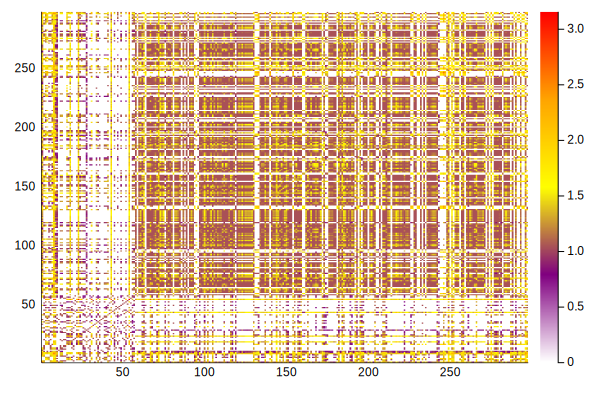

In [26]:
heatmap(log10.(dist.+1),color=cgrad([:white, :purple, :yellow, :orange, :red]))

In [27]:
png("prog0.png")

In [7]:
# extract information from dataframe for regions and populations etc
#
#population - need to do this again to get the non-zero elements!
#brk=majorlocalities*2
townpop1=wapopint=parse.(Int, replace.(wapop[1:2:brk,2], r","=> ""))
townpop2=wapopint=parse.(Int, replace.(wapop[brk+1:end,2], r","=> ""))
popl=[townpop1; townpop2]
#townpop=townpop[1:end-1]
#region and assign colouring
nodecolor = [colorant"lightseagreen", colorant"orange", colorant"red", colorant"green", colorant"yellow", colorant"brown", colorant"pink", colorant"purple", colorant"blue", colorant"violet", colorant"black"]
townlabel=[wapop[1:2:brk,3]; wapop[brk+1:end,3]]
#townlabel=townlabel[1:end-1]
regions=unique(townlabel)
regioni=Array{Int,1}(undef,nr)
for i in 1:nr
    regioni[i]=findall(x->x==1,townlabel[i].==regions)[1]
end
nodefillc = nodecolor[regioni]
#town names
townlabel=[wapop[1:2:brk,1]; wapop[brk+1:end,1]]
#townlabel=townlabel[1:end-1]
posn=Array(waloc[:,3:4])

297×2 Array{Float64,2}:
 115.861  -31.9505
 115.64   -33.3256
 114.614  -28.7797
 121.466  -30.749
 117.884  -35.0269
 115.346  -33.6532
 116.846  -20.7353
 122.23   -17.9644
 118.486  -20.9818
 121.993  -33.4866
 115.637  -31.5471
 116.183  -33.3154
 116.703  -31.642
   ⋮      
 121.703  -18.731
 115.209  -25.062
 123.168  -17.6448
 127.542  -25.2828
 123.659  -17.737
 125.616  -26.5265
 123.121  -22.044
 128.616  -18.794
 115.61   -28.3847
 124.726  -22.3284
 124.15   -18.0392
 117.12   -20.7518

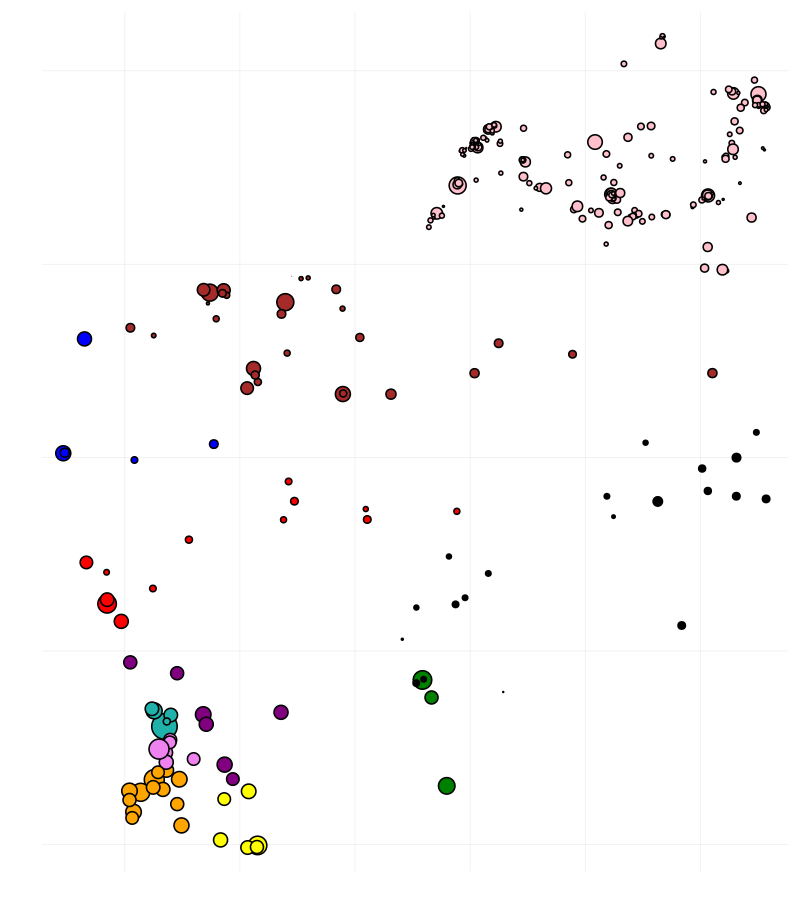

In [8]:
plot(posn[:,1],posn[:,2], seriestype = :scatter, markercolor=nodefillc,markersize=log.(popl),legend=false,axis=false,size=(800,900))


In [20]:
png("prog1.png")

In [22]:
import Cairo, Fontconfig

In [23]:
gg=gplot(Graph(dist.>9),nodelabel=townlabel,nodelabelsize=log.(popl),nodesize=10 .+ log2.(popl),nodefillc=nodefillc)
draw(PNG("prog2.png", 32cm, 32cm), gg)

In [24]:
vecx=Vector(posn[:,1])
vecy=Vector(posn[:,2])
gg=gplot(Graph(dist),vecx,-vecy,nodesize=log.(popl), NODESIZE=0.03,  nodefillc=nodefillc,edgestrokec=colorant"black",edgelinewidth=dist[dist.>0])
draw(PNG("prog3.png", 32cm, 32cm), gg)


In [12]:
using JLD2, FileIO, Statistics

In [18]:
ldd=load("25_regional_output.jld")
vs=ldd["vuln"]
vv=mean(vs,dims=1)

1×297 Array{Float64,2}:
 0.0231312  0.922921  1.0  1.06919  …  1.19406  1.16361  1.00659  1.06752

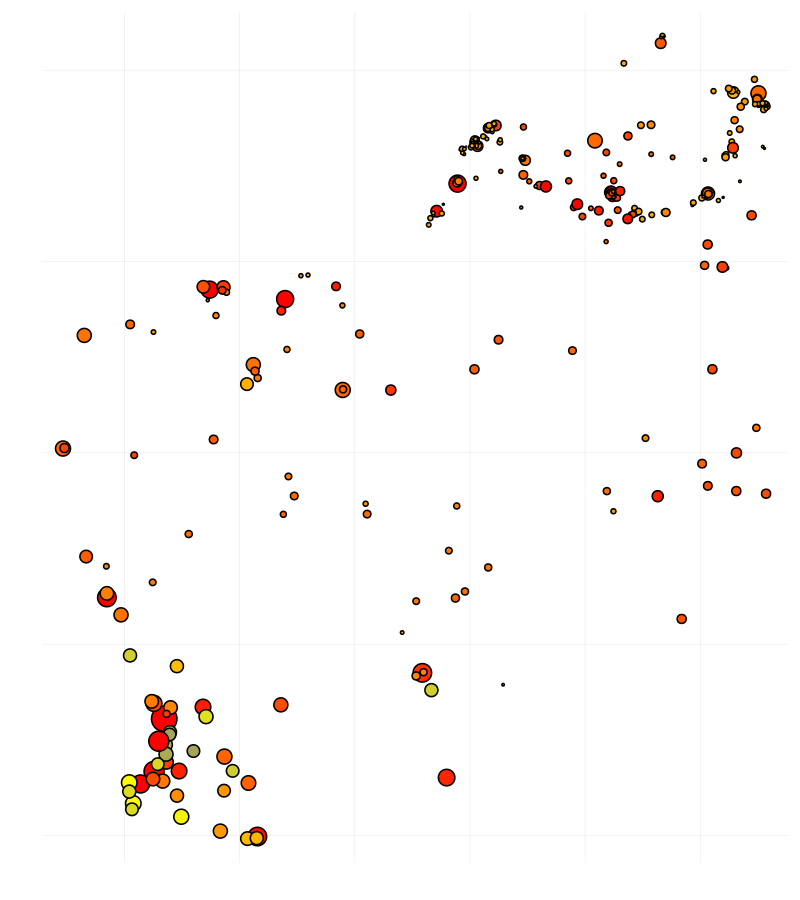

In [19]:

clrmp=cgrad([:green, :blue, :yellow, :red])
nodefillc=clrmp[1 ./ vv][1:end]
plot(posn[:,1],posn[:,2], seriestype = :scatter, markercolor=nodefillc,markersize=log.(popl),legend=false,axis=false,size=(800,900))


In [25]:
png("prog4.pdf")